<a href="https://colab.research.google.com/github/karim306/Flowers-Classfier/blob/main/FlowerClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install dependeiceies and Setup**

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "kareemahm3d" # username from the json file
os.environ['KAGGLE_KEY'] = "505cd3f923d9c7e981e2a419cb8f88b4" # key from the json fil

In [14]:
import tensorflow as tf


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Download The DataSet


In [3]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
 99% 240M/242M [00:08<00:00, 37.7MB/s]
100% 242M/242M [00:08<00:00, 29.9MB/s]


# Unzip the dataset


In [4]:
# Unzip the dataset into the same directory
!unzip -q 5-flower-types-classification-dataset.zip -d ./5-flower-dataset


# **Split The Data**

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Original dataset directory
base_dir = '/content/5-flower-dataset/flower_images'  # Replace with the actual dataset directory

# Paths for the new directories outside of the original dataset folder
output_base = './split_data'  # Directory to contain train, val, and test directories
train_dir = os.path.join(output_base, 'train')
val_dir = os.path.join(output_base, 'val')
test_dir = os.path.join(output_base, 'test')

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the classes (subfolders) from the original dataset
classes = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)


In [9]:
# Split data into train, val, and test sets (70% train, 20% val, 10% test)
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    images = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]

    if len(images) == 0:
        print(f"Warning: No images found for class '{cls}'. Skipping.")
        continue  # Skip empty directories

    # Split into train and remaining (val + test)
    train_images, val_test_images = train_test_split(images, test_size=0.3, random_state=42)
    # Split val + test into separate validation and test sets
    val_images, test_images = train_test_split(val_test_images, test_size=0.33, random_state=42)  # 33% of 30% = 10%

    # Move images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))
    for img in val_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(val_dir, cls, img))
    for img in test_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(test_dir, cls, img))


In [10]:
import shutil
import os

# Path to the split directories
for dir_path in [train_dir, val_dir, test_dir]:
    for root, dirs, files in os.walk(dir_path):
        for dir_name in dirs:
            # Check if the folder name is 'train', 'val', or 'test'
            if dir_name in ['train', 'val', 'test','flower_images']:
                unwanted_dir = os.path.join(root, dir_name)
                shutil.rmtree(unwanted_dir)  # Remove the unwanted directory
                print(f"Removed unwanted folder: {unwanted_dir}")


# **Class Names**

In [11]:
import os

def class_name_from_folder(folder_path):
  """
  Extracts class names from subfolders within a given folder.

  Args:
    folder_path: The path to the folder containing class subfolders.

  Returns:
    A list of class names (subfolder names).
  """
  return [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

class_name = class_name_from_folder('/content/split_data/train')
class_name

['Lotus', 'Tulip', 'Lilly', 'Orchid', 'Sunflower']

# **Visualize Images**

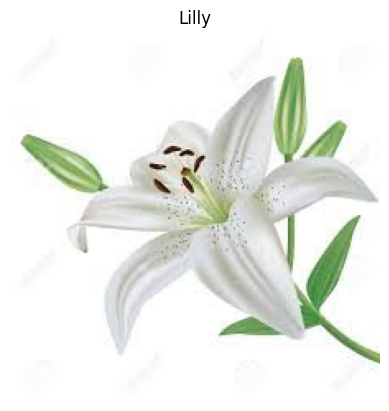

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def visualize_random_image(target_dir, target_class):
    """
    Visualizes a random image from a specific class directory
    """
    # Build the correct path using os.path.join
    image_dir = os.path.join(target_dir, target_class)

    # Check if the directory exists
    if not os.path.exists(image_dir):
        print(f"Directory {image_dir} does not exist.")
        return

    # Get a random image from the class directory
    random_image = random.choice(os.listdir(image_dir))

    # Build the full image path
    img_path = os.path.join(image_dir, random_image)

    # Read and display the image
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Example usage:
visualize_random_image("/content/split_data/train", "Lilly")


# **2. Remove dodgy images:**

In [16]:
import cv2
import imghdr

In [25]:
data_dir = '/content/flower_images'

In [28]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Class Names**

In [21]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/split_data/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="/content/split_data/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="/content/split_data/val",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 3500 images belonging to 5 classes.
Found 495 images belonging to 5 classes.
Found 1005 images belonging to 5 classes.


# **Load Data**

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data = tf.keras.utils.image_dataset_from_directory('/content/flower_images')

Found 4999 files belonging to 5 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [32]:
len(batch)

2

In [33]:
batch[1]


array([4, 2, 3, 2, 0, 0, 2, 4, 0, 4, 4, 1, 2, 3, 1, 3, 1, 3, 2, 3, 3, 3,
       2, 0, 4, 2, 3, 1, 3, 4, 3, 3], dtype=int32)

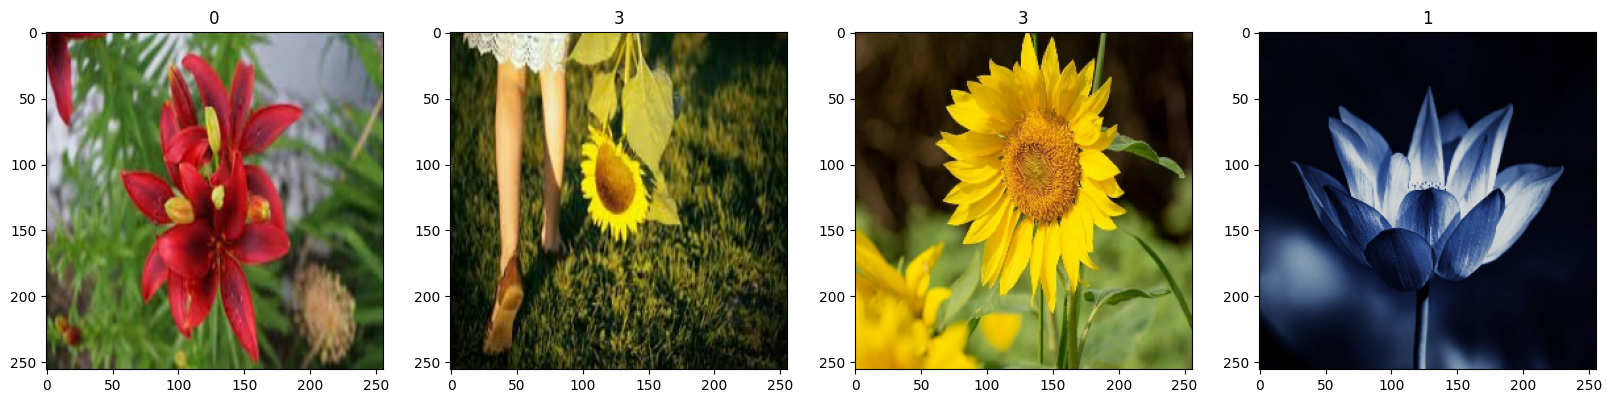

In [37]:
# know each number represent any of our 5 classes

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scaling The Data**

In [38]:
data = data.map(lambda x,y: (x/255, y))

In [39]:
data.as_numpy_iterator().next()

(array([[[[3.40081185e-01, 3.12630206e-01, 2.49885112e-01],
          [3.57766539e-01, 3.30315560e-01, 2.67570466e-01],
          [3.80497843e-01, 3.53046864e-01, 2.90301740e-01],
          ...,
          [3.80193025e-01, 3.44898909e-01, 3.25291067e-01],
          [3.99096191e-01, 3.63802075e-01, 3.44194233e-01],
          [4.05530035e-01, 3.70235920e-01, 3.42784941e-01]],
 
         [[3.44363332e-01, 3.16912353e-01, 2.54167259e-01],
          [3.57950360e-01, 3.30499381e-01, 2.67754287e-01],
          [3.74609381e-01, 3.47158402e-01, 2.84413308e-01],
          ...,
          [3.80009204e-01, 3.44715059e-01, 3.25107217e-01],
          [3.99096191e-01, 3.63802075e-01, 3.43826592e-01],
          [4.05659646e-01, 3.70365530e-01, 3.42914522e-01]],
 
         [[3.54382694e-01, 3.26931715e-01, 2.64186591e-01],
          [3.62571925e-01, 3.35120946e-01, 2.72375852e-01],
          [3.74915749e-01, 3.47464770e-01, 2.84719676e-01],
          ...,
          [3.75497729e-01, 3.40203613e-01, 3.2059

In [40]:
batch_iterator = data.as_numpy_iterator().next()

In [42]:
batch_iterator[0].max()

1.0

# **Split The Data**

In [78]:
len(data )

157

In [79]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [80]:
val_size

31

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Building The Model**

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [83]:
model = Sequential()

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))  # Increased number of filters and more layers
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))  # Another convolutional layer
model.add(MaxPooling2D())

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))  # Increased dense layer size
model.add(Dense(256, activation='relu'))  # Another dense layer
num_classes = 5  # Replace with the actual number of classes in your dataset
# Output layer for multi-class classification
model.add(Dense(num_classes, activation='softmax'))  # 'num_classes' should be the number of classes in your dataset


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,075,621 (49.88 MB)

 Trainable params: 13,075,621 (49.88 MB)

 Non-trainable params: 0 (0.00 B)

# **Training The Model**

In [87]:
logdir='logs'

In [88]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [89]:
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer from tensorflow.keras.optimizers

# Change this if labels are integer-encoded
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])



In [90]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.2927 - loss: 1.6181 - val_accuracy: 0.5393 - val_loss: 1.1613
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.5155 - loss: 1.1730 - val_accuracy: 0.5554 - val_loss: 1.1100
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.6095 - loss: 1.0049 - val_accuracy: 0.6764 - val_loss: 0.8326
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.7021 - loss: 0.7817 - val_accuracy: 0.7208 - val_loss: 0.7702
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.7898 - loss: 0.5631 - val_accuracy: 0.7631 - val_loss: 0.7495
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.8712 - loss: 0.3459 - val_accuracy: 0.8236 - val_loss: 0.5969
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.9279 - loss: 0.2141 - val_accuracy: 0.8367 - val_loss: 0.6968
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.9607 - loss: 0